In [3]:
#pip install Tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt


In [32]:
#Data Loading....
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Data Normalization

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


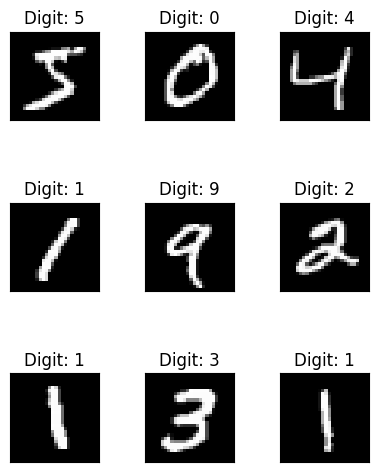

In [14]:
#Visualize some samples in the dataset

fig=plt.figure(figsize=(4,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [16]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [33]:
#Encode the labels
print("before encoding",y_train[:10])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("after encoding", y_train[:10])

before encoding [5 0 4 1 9 2 1 3 1 4]
after encoding [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [25]:
#Model Initialization/Architecture
model=tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [35]:
# Model Initialization/Architecture (redefined here to ensure clean state)
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model Compilation (recompiled here)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training & Evalution
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoints=ModelCheckpoint('model_weights.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
early_stopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
callbacks=[checkpoints,early_stopping]
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),shuffle=True,callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9118 - loss: 0.2836
Epoch 1: val_accuracy improved from -inf to 0.98420, saving model to model_weights.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9118 - loss: 0.2834 - val_accuracy: 0.9842 - val_loss: 0.0503
Epoch 2/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9877 - loss: 0.0410
Epoch 2: val_accuracy improved from 0.98420 to 0.98870, saving model to model_weights.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0.9887 - val_loss: 0.0349
Epoch 3/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9907 - loss: 0.0295
Epoch 3: val_accuracy did not improve from 0.98870
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 4/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9937 - loss: 0.0187
Epoch 4: val_accuracy improved from 0.98870 to 0.99060, saving model to model_weights.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9906 - val_loss: 0.0289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 5: val_accuracy improved from 0.99060 to 0.99110, saving model to model_weights.h5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9911 - val_loss: 0.0276
Epoch 6/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9964 - loss: 0.0103
Epoch 6: val_accuracy did not improve from 0.99110
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9895 - val_loss: 0.0337
Epoch 7/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9976 - loss: 0.0071
Epoch 7: val_accuracy did not improve from 0.99110
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9904 - val_loss: 0.0395
Epoch 8/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9975 - loss: 0.0074
Epoch 8: val_accuracy did not improve from 0.99110
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


You can save the entire model (architecture, weights, and optimizer state) using `model.save()`.

In [37]:
# Save the model
model.save('mnist_model.keras')
print("Model saved successfully.")

Model saved successfully.


You can then load the model back using `tf.keras.models.load_model()`.

In [38]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_model.keras')
print("Model loaded successfully.")

# You can now use the loaded_model for predictions or evaluation

Model loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


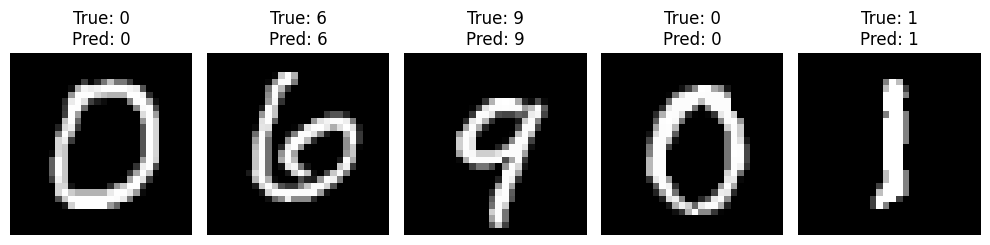

In [40]:
# Select a few sample images and labels from the test set
num_samples_to_display = 5
sample_images = x_test[10:10+num_samples_to_display]
sample_labels = y_test[10:10+num_samples_to_display]

# Make predictions on the sample images
predictions = loaded_model.predict(sample_images)

# Get the predicted class for each sample
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

# Display the sample images with their true and predicted labels
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()